In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np

In [37]:
spotify_songs = pd.read_csv('spotify_songs_sofia.csv', delimiter=',')
print(spotify_songs)
print(spotify_songs.columns)

                              ts platform  ms_played conn_country  \
0      2023-04-04 18:25:30+00:00  android      11451           BR   
1      2023-04-04 18:25:47+00:00  android      16559           BR   
2      2023-04-04 18:25:55+00:00  android       4168           BR   
3      2023-04-04 19:23:17+00:00  android      80840           BR   
4      2023-04-04 22:51:39+00:00  android      67760           BR   
...                          ...      ...        ...          ...   
25992  2026-01-29 22:55:17+00:00  android     122973           BR   
25993  2026-01-29 22:55:20+00:00  android       2639           BR   
25994  2026-01-29 22:56:55+00:00  android      96005           BR   
25995  2026-01-29 22:57:07+00:00  android       9907           BR   
25996  2026-01-29 22:59:19+00:00  android     133154           BR   

                                     ip_addr  \
0                              177.76.148.44   
1                              177.76.148.44   
2                          

In [38]:
df_inteiro = spotify_songs.copy()

df = df_inteiro[['master_metadata_album_album_name', 'ms_played']]
df_new = df.groupby('master_metadata_album_album_name').sum('ms_played')

print(df_new)

                                              ms_played
master_metadata_album_album_name                       
#BrooklynBloodPop!                                 2247
$IMBIO$E                                         352578
& Cry!                                           169626
&TWICE                                            42143
'Caligo Pt.1'                                    152061
...                                                 ...
回:Walpurgis Night                                199133
妳在哪裡 (WYA) Remix                                 375145
宵 -YOI-                                           84846
重啟                                               332292
﻿cignature 5th EP Album 'Sweetie but Saltie'      11926

[3469 rows x 1 columns]


In [39]:
df_new = df_new.sort_values(by='ms_played', ascending=False)

# Transforma o número 15245256 em "15.245.256"
df_new['ms_played_formatado'] = df_new['ms_played'].apply(lambda x: f"{x:,.0f}".replace(",", "."))

# Criando a coluna de minutos
df_new['minutos'] = df_new['ms_played'] / 60000

# Criando a coluna de horas
df_new['horas'] = df_new['ms_played'] / 3600000

print(df_new.head(5))

                                  ms_played ms_played_formatado      minutos  \
master_metadata_album_album_name                                               
Chase Atlantic                     60373370          60.373.370  1006.222833   
Era uma vez                        52588073          52.588.073   876.467883   
So Close To What                   28734265          28.734.265   478.904417   
ROMANCE : UNTOLD                   23300973          23.300.973   388.349550   
BEAUTY IN DEATH                    19717318          19.717.318   328.621967   

                                      horas  
master_metadata_album_album_name             
Chase Atlantic                    16.770381  
Era uma vez                       14.607798  
So Close To What                   7.981740  
ROMANCE : UNTOLD                   6.472493  
BEAUTY IN DEATH                    5.477033  


C:\Users\kaiquesouza-ieg\AppData\Local\Temp\ipykernel_23000\1411447356.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  grafico = sns.barplot(


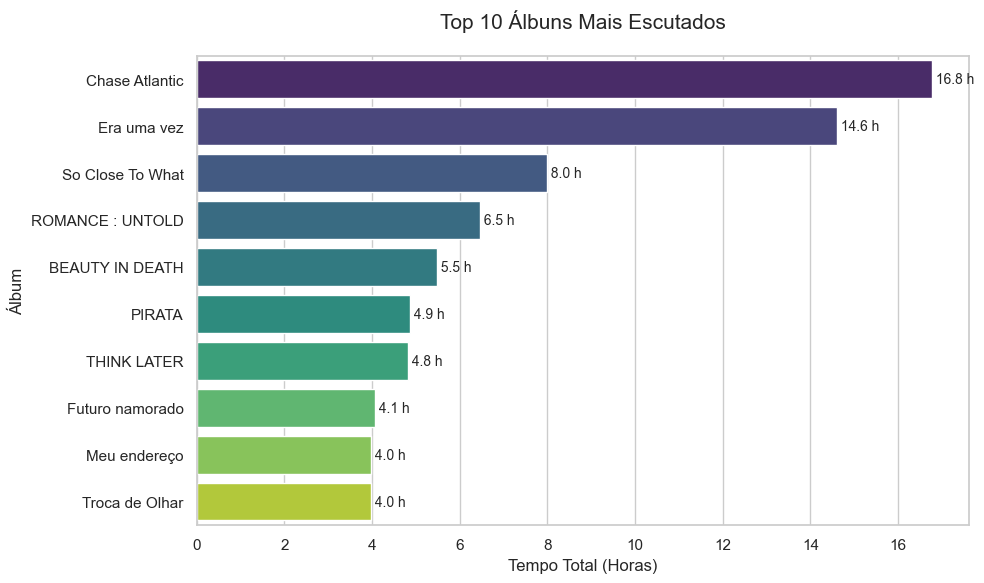

In [41]:
# Configurando o estilo visual
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# Criando o gráfico de barras horizontais
# Pegando apenas os top 10 para não poluir o gráfico
top_albuns = df_new.head(10)

grafico = sns.barplot(
    data=top_albuns,
    x='horas', 
    y='master_metadata_album_album_name', 
    palette='viridis'
)

# Ajustando títulos e labels
plt.title('Top 10 Álbuns Mais Escutados', fontsize=15, pad=20)
plt.xlabel('Tempo Total (Horas)', fontsize=12)
plt.ylabel('Álbum', fontsize=12)

# Adicionando o valor exato na ponta de cada barra para facilitar a leitura
for i, valor in enumerate(top_albuns['horas']):
    plt.text(valor, i, f' {valor:.1f} h', va='center', fontsize=10)

plt.tight_layout()
plt.show()

In [42]:
df = df_inteiro[['genero', 'ms_played']].copy()

df_new = df.groupby('genero').sum('ms_played')
df_new = df_new.sort_values(by='ms_played', ascending=True)

# Criando a coluna de minutos
df_new['minutos'] = df_new['ms_played'] / 60000

# Criando a coluna de horas
df_new['horas'] = df_new['ms_played'] / 3600000

print(df_new.head(5))

                ms_played   minutos     horas
genero                                       
mariachi              182  0.003033  0.000051
tropical house        632  0.010533  0.000176
soul                 1159  0.019317  0.000322
worship              1210  0.020167  0.000336
Chill House          1563  0.026050  0.000434


C:\Users\kaiquesouza-ieg\AppData\Local\Temp\ipykernel_23000\2720761600.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\kaiquesouza-ieg\AppData\Local\Temp\ipykernel_23000\2720761600.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


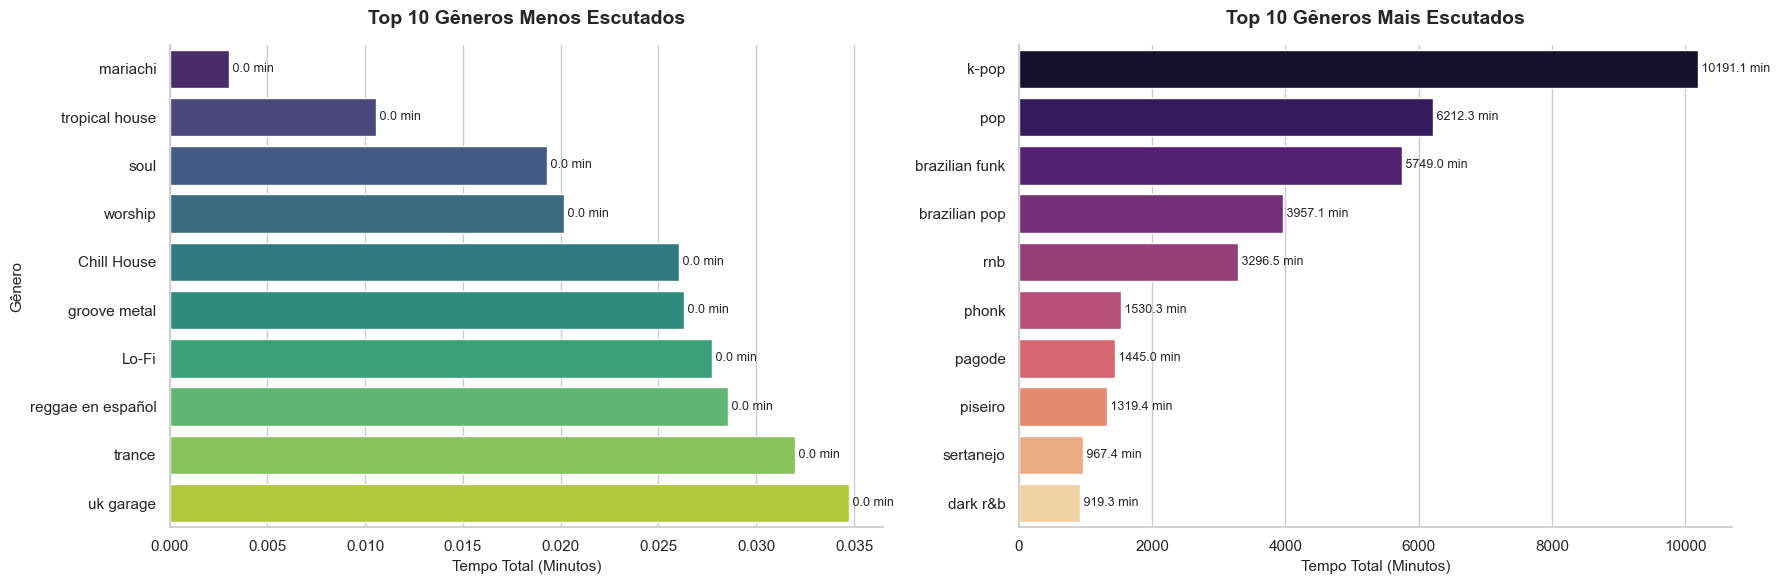

In [43]:
# Configurando o estilo visual
sns.set_theme(style="whitegrid")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Dados
top_menos = df_new.head(10)                             # 10 menos escutados
top_mais  = df_new.nlargest(10, 'minutos').sort_values( # 10 mais escutados
    'minutos', ascending=False
)

# Gráfico 1 - Top 10 Menos Escutados
sns.barplot(
    data=top_menos,
    x='minutos',
    y='genero',
    palette='viridis',
    ax=ax1,
)
ax1.set_title('Top 10 Gêneros Menos Escutados', fontsize=14, pad=15, fontweight='bold')
ax1.set_xlabel('Tempo Total (Minutos)', fontsize=11)
ax1.set_ylabel('Gênero', fontsize=11)

for i, valor in enumerate(top_menos['minutos']):
    ax1.text(valor, i, f' {valor:.1f} min', va='center', fontsize=9)

# Remove a borda direita e de cima para ficar mais limpo
sns.despine(ax=ax1)

# Gráfico 2 - Top 10 Mais Escutados
sns.barplot(
    data=top_mais,
    x='minutos',
    y='genero',
    palette='magma', # paleta diferente para distinguir visualmente os dois gráficos
    ax=ax2,
)
ax2.set_title('Top 10 Gêneros Mais Escutados', fontsize=14, pad=15, fontweight='bold')
ax2.set_xlabel('Tempo Total (Minutos)', fontsize=11)
ax2.set_ylabel('') # eixo Y só no primeiro para não repetir o label

for i, valor in enumerate(top_mais['minutos']):
    ax2.text(valor, i, f' {valor:.1f} min', va='center', fontsize=9)

sns.despine(ax=ax2)
plt.tight_layout()
plt.show()

C:\Users\kaiquesouza-ieg\AppData\Local\Temp\ipykernel_23000\2171273427.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  grafico = sns.barplot(


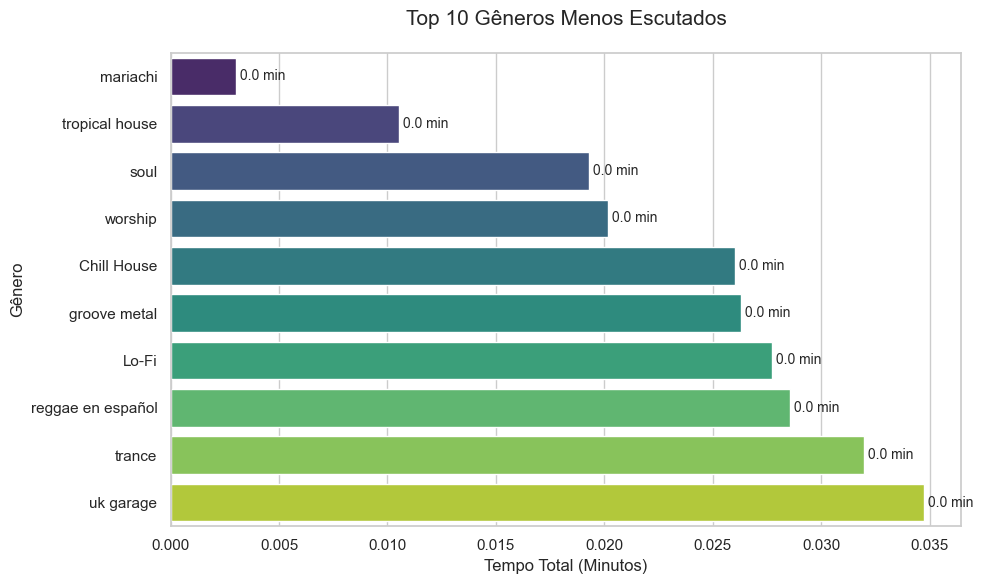

In [44]:
# Configurando o estilo visual
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# Criando o gráfico de barras horizontais
# Pegando apenas os top 10 para não poluir o gráfico
top_albuns = df_new.head(10)

grafico = sns.barplot(
    data=top_albuns,
    x='minutos', 
    y='genero', 
    palette='viridis'
)

# Ajustando títulos e labels
plt.title('Top 10 Gêneros Menos Escutados', fontsize=15, pad=20)
plt.xlabel('Tempo Total (Minutos)', fontsize=12)
plt.ylabel('Gênero', fontsize=12)

# Adicionando o valor exato na ponta de cada barra para facilitar a leitura
for i, valor in enumerate(top_albuns['minutos']):
    plt.text(valor, i, f' {valor:.1f} min', va='center', fontsize=10)

plt.tight_layout()
plt.show()

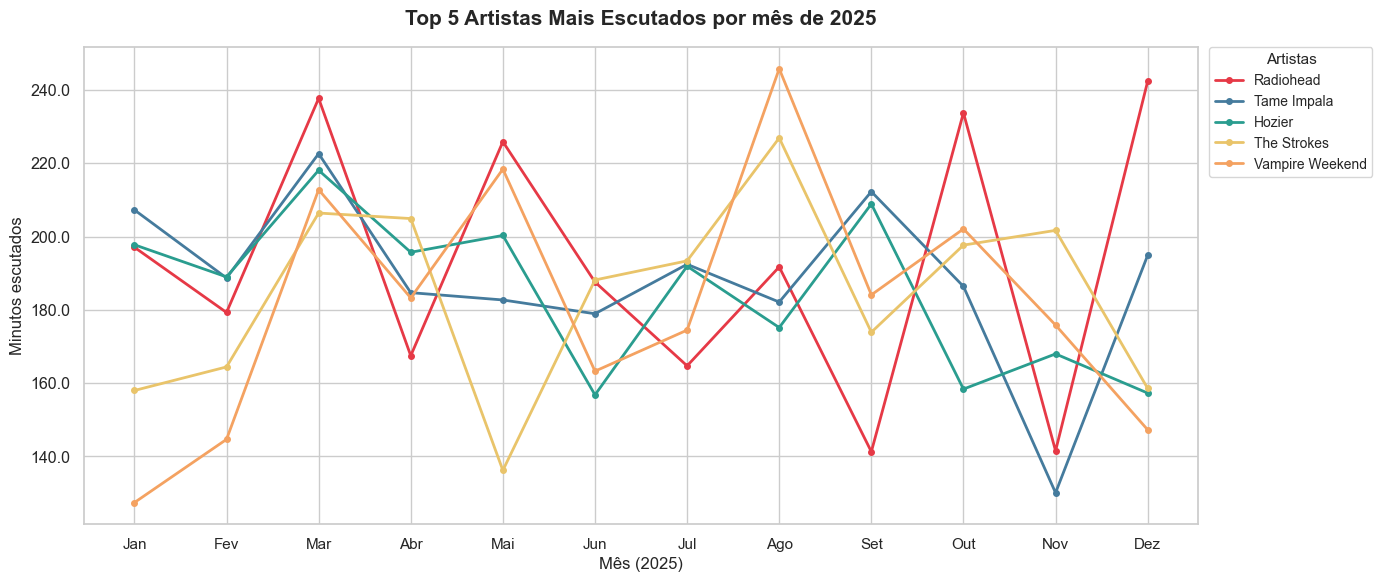

In [45]:
# Configurações
graph_year = 2025      # Ano a ser exibido no eixo X
top_n      = 5         # Número de artistas a exibir
time_unit  = "minutos" # Opções: "dias" | "horas" | "minutos" | "segundos"
line_colors_arr = [    # Paleta de cores do gráfico
    "#e63946", "#457b9d", "#2a9d8f", "#e9c46a", "#f4a261",
    "#6a4c93", "#1982c4", "#8ac926", "#ff595e", "#6a994e",
]

# Conversão de unidade
TIME_FACTORS = {
    "segundos": 1,
    "minutos": 1 / 60,
    "horas": 1 / 3_600,
    "dias": 1 / 86_400,
}
TIME_LABELS = {
    "segundos": "Segundos escutados",
    "minutos": "Minutos escutados",
    "horas": "Horas escutadas",
    "dias": "Dias escutados",
}

assert time_unit in TIME_FACTORS, f"Unidade de tempo inválida: {time_unit}"
factor = TIME_FACTORS[time_unit]

rng = np.random.default_rng(42)
artistas_pool = [
    "Arctic Monkeys", "Radiohead", "Tame Impala", "The Strokes",
    "Mac DeMarco", "Bon Iver", "Hozier", "Vampire Weekend",
    "Frank Ocean", "Kendrick Lamar", "Tyler the Creator", "CHVRCHES",
]

n = 8_000
df_raw = pd.DataFrame({
    "artist_name": rng.choice(artistas_pool, size=n, p=np.ones(len(artistas_pool)) / len(artistas_pool)),
    "played_at": pd.to_datetime(
        rng.integers(
            pd.Timestamp(f"{graph_year}-01-01").value,
            pd.Timestamp(f"{graph_year}-12-31").value,
            size=n,
        )
    ),
    "ms_played": rng.integers(30_000, 360_000, size=n),
})

# Pré-processamento
df = df_raw.copy()
df["played_at"] = pd.to_datetime(df["played_at"])

# Filtra o ano selecionado
df = df[df["played_at"].dt.year == graph_year].copy()

df["month"] = df["played_at"].dt.month
df["time_value"] = df["ms_played"] / 1_000 * factor # transforma em milisegundos na unidade desejada

# Top n artistas (por tempo total no ano)
top10 = (
    df.groupby("artist_name")["time_value"]
    .sum()
    .nlargest(top_n)
    .index.tolist()
)

df_top = df[df["artist_name"].isin(top10)]

# Agrupa por artista × mês
df_grouped = (
    df_top
    .groupby(["artist_name", "month"])["time_value"]
    .sum()
    .reset_index()
)

# Garante todos os 12 meses para cada artista (preenche com 0)
all_months = pd.DataFrame({"month": range(1, 13)})
all_artists = pd.DataFrame({"artist_name": top10})
full_index = all_artists.merge(all_months, how="cross")
df_grouped = full_index.merge(df_grouped, on=["artist_name", "month"], how="left").fillna(0)

# Pivot para facilitar o plot
df_pivot = df_grouped.pivot(index="month", columns="artist_name", values="time_value")
df_pivot = df_pivot[top10] # ordena colunas pelo ranking

# Plot
sns.set_theme(style="whitegrid", font_scale=1.05)
fig, ax = plt.subplots(figsize=(14, 6))
for artist, color in zip(top10, line_colors_arr):
    ax.plot(
        df_pivot.index,
        df_pivot[artist],
        label=artist,
        color=color,
        linewidth=2,
        marker="o",
        markersize=4,
    )

# Eixo X: nomes dos meses
month_names = ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago", "Set", "Out", "Nov", "Dez"]
ax.set_xticks(range(1, 13))
ax.set_xticklabels(month_names, fontsize=11)

# Eixo Y: formatação dinâmica
ax.yaxis.set_major_formatter(ticker.FuncFormatter(
    lambda v, _: f"{v:,.1f}"
))
ax.set_ylabel(TIME_LABELS[time_unit], fontsize=12)
ax.set_xlabel(f"Mês ({graph_year})", fontsize=12)

ax.set_title(
    f"Top {top_n} Artistas Mais Escutados por mês de {graph_year}",
    fontsize=15, pad=16, fontweight="bold"
)

# Legenda
ax.legend(
    title="Artistas",
    title_fontsize=11,
    fontsize=10,
    loc="upper left",
    bbox_to_anchor=(1.01, 1),
    borderaxespad=0,
    frameon=True,
)

plt.tight_layout()
plt.show()

C:\Users\kaiquesouza-ieg\AppData\Local\Temp\ipykernel_23000\125213807.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


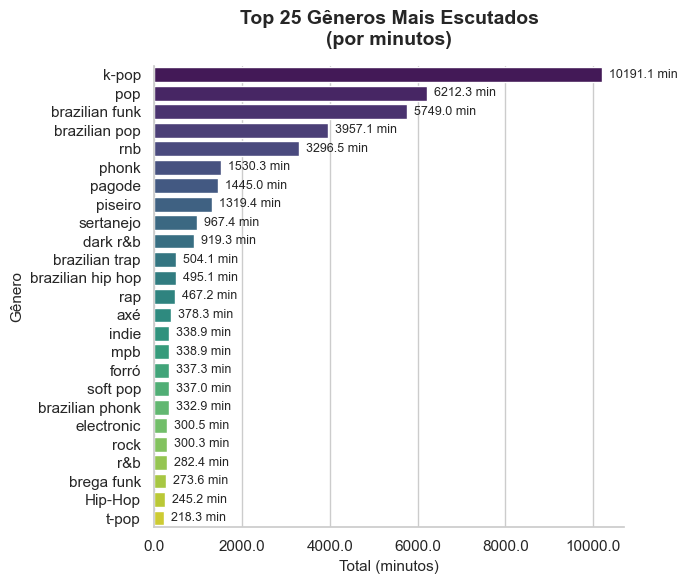

In [ ]:
# Configurações
top_n = 25

df_reset = df_new.reset_index()  # transforma o index 'genero' em coluna

# Helpers
def best_time_unit(series_ms: pd.Series):
    median_s = series_ms.median() / 1_000
    if   median_s < 60:     return "segundos", 1 / 1_000
    elif median_s < 3_600:  return "minutos", 1 / 60_000
    elif median_s < 86_400: return "horas", 1 / 3_600_000
    else:                   return "dias", 1 / 86_400_000

# Unidade dinâmica
unit_label, factor = best_time_unit(df_reset['ms_played'])
unit_suffix = {"segundos": "s", "minutos": "min", "horas": "h", "dias": "d"}[unit_label]

df_reset['time_converted'] = df_reset['ms_played'] * factor

top_por_ms      = df_reset.nlargest(top_n, 'ms_played').sort_values('ms_played', ascending=False)
top_por_minutos = df_reset.nlargest(top_n, 'minutos').sort_values('minutos',     ascending=False)

# Plot
sns.set_theme(style="whitegrid")
fig, ax1 = plt.subplots(1, figsize=(7, 6))

sns.barplot(
    data=top_por_ms,
    x='time_converted',
    y='genero',
    palette='viridis',
    ax=ax1,
)
ax1.set_title(
    f'Top {top_n} Gêneros Mais Escutados\n(por {unit_label})',
    fontsize=14, pad=15, fontweight='bold'
)
ax1.set_xlabel(f'Total ({unit_label})', fontsize=11)
ax1.set_ylabel('Gênero', fontsize=11)

for i, valor in enumerate(top_por_ms['time_converted']):
    ax1.text(valor, i, f'  {valor:.1f} {unit_suffix}', va='center', fontsize=9)

ax1.xaxis.set_major_formatter(plt.FuncFormatter(lambda v, _: f"{v:.1f}"))
sns.despine(ax=ax1)
plt.tight_layout()
plt.show()